1. Ініціалізація середовища


In [64]:
# Встановлення необхідних пакетів (виконується один раз)
install.packages("party")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("dplyr")
install.packages("partykit")
install.packages("ggparty")

# Підключення бібліотек
library(party)
library(rpart)
library(rpart.plot)
library(dplyr)
library(partykit)
library(ggparty)

Warning message:
"package 'party' is in use and will not be installed"
Warning message:
"package 'rpart' is in use and will not be installed"
Warning message:
"package 'rpart.plot' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'partykit' is in use and will not be installed"
Warning message:
"package 'ggparty' is in use and will not be installed"


2. Завантаження та перегляд набору даних


In [65]:
# Завантаження вбудованого набору даних readingSkills
data("readingSkills", package = "party")

# Виведення перших рядків даних
head(readingSkills)

# Перевірка структури набору даних
str(readingSkills)

# Опис змінних у наборі даних
summary(readingSkills)


,nativeSpeaker,age,shoeSize,score
,<fct>,<int>,<dbl>,<dbl>
1,yes,5,24.83189,32.29385
2,yes,6,25.95238,36.63105
3,no,11,30.42170,49.60593
4,yes,7,28.66450,40.28456
5,yes,11,31.88207,55.46085
6,yes,10,30.07843,52.83124


'data.frame':	200 obs. of  4 variables:
 $ nativeSpeaker: Factor w/ 2 levels "no","yes": 2 2 1 2 2 2 1 2 2 1 ...
 $ age          : int  5 6 11 7 11 10 7 11 5 7 ...
 $ shoeSize     : num  24.8 26 30.4 28.7 31.9 ...
 $ score        : num  32.3 36.6 49.6 40.3 55.5 ...


 nativeSpeaker      age            shoeSize         score      
 no :100       Min.   : 5.000   Min.   :23.17   Min.   :25.26  
 yes:100       1st Qu.: 6.000   1st Qu.:26.23   1st Qu.:33.94  
               Median : 8.000   Median :27.85   Median :40.33  
               Mean   : 7.925   Mean   :27.87   Mean   :40.66  
               3rd Qu.: 9.250   3rd Qu.:29.49   3rd Qu.:47.57  
               Max.   :11.000   Max.   :32.33   Max.   :56.71  

3. Вивчення довідки по функції ctree()


In [75]:
?ctree  # Вивести документацію про функцію ctree()


ctree                  package:party                   R Documentation

_C_o_n_d_i_t_i_o_n_a_l _I_n_f_e_r_e_n_c_e _T_r_e_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Recursive partitioning for continuous, censored, ordered, nominal
     and multivariate response variables in a conditional inference
     framework.

_U_s_a_g_e:

     ctree(formula, data, subset = NULL, weights = NULL, 
           controls = ctree_control(), xtrafo = ptrafo, ytrafo = ptrafo, 
           scores = NULL)
     
_A_r_g_u_m_e_n_t_s:

 formula: a symbolic description of the model to be fit. Note that
          symbols like ':' and '-' will not work and the tree will make
          use of all variables listed on the rhs of 'formula'.

    data: a data frame containing the variables in the model.

  subset: an optional vector specifying a subset of observations to be
          used in the fitting process.

 weights: an optional vector of weights to be used in the fitting
  

4. Побудова базового дерева рішень


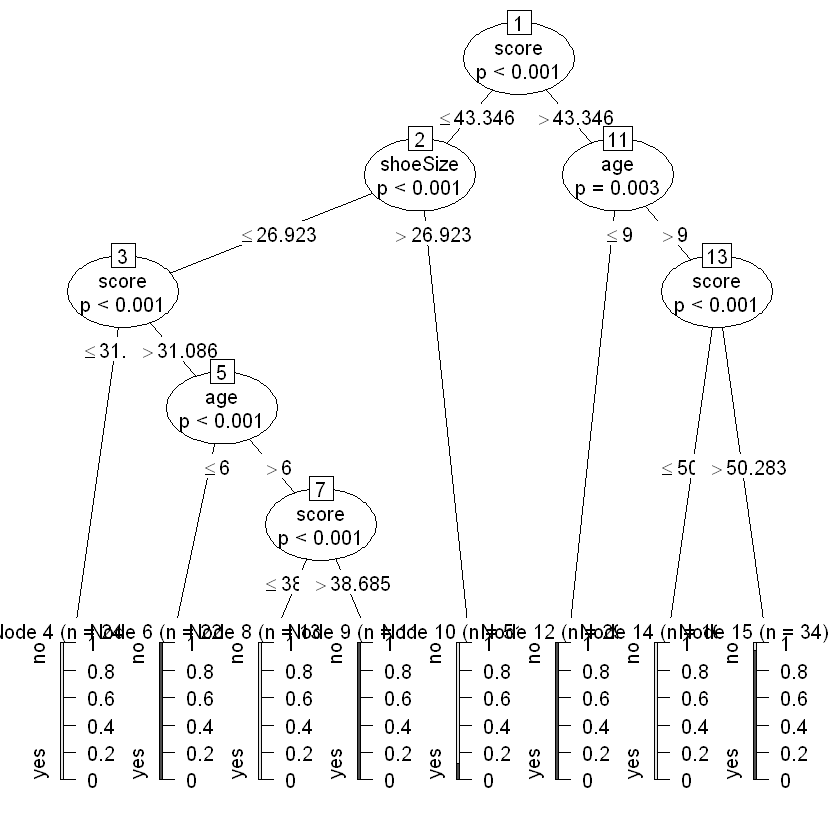

In [67]:
# Побудова дерева рішень
model_1 <- ctree(nativeSpeaker ~ age + shoeSize + score, data = readingSkills)

# Візуалізація дерева
plot(model_1)


5. Налаштування гіперпараметрів


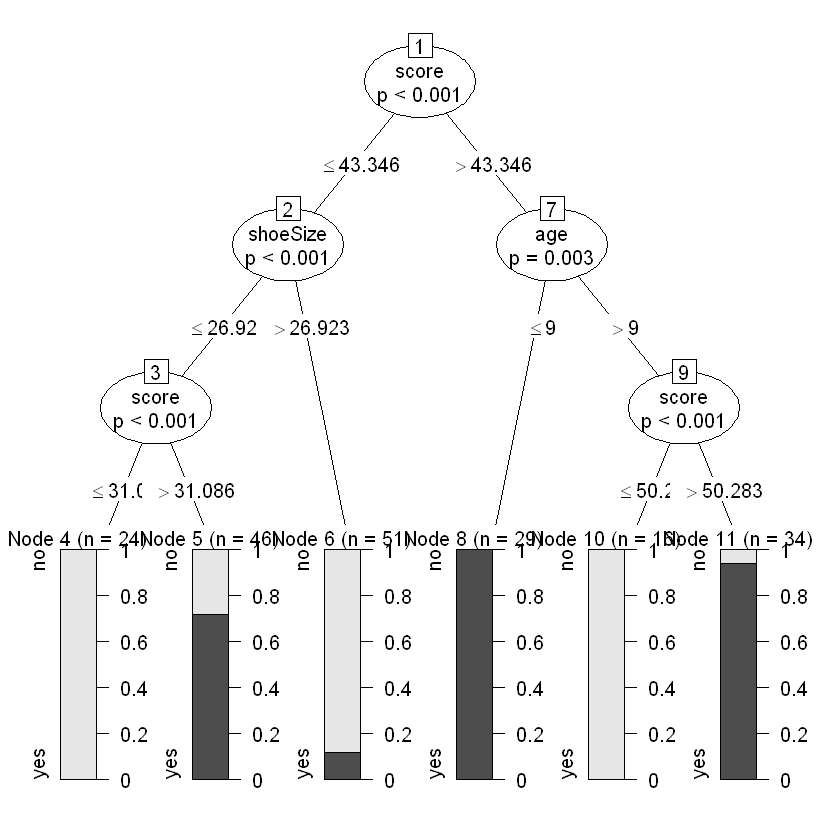

In [68]:
# Налаштування параметрів побудови дерева
control_params <- ctree_control(minsplit = 5, minbucket = 3, maxdepth = 3)

# Побудова дерева рішень
model_2 <- ctree(nativeSpeaker ~ age + shoeSize + score, 
                 data = readingSkills, 
                 control = control_params)  # <-- Виправлено!

# Візуалізація дерева
plot(model_2)

6. Аналіз отриманих результатів


In [69]:
# Перевірка важливості предикторів
print(model_2)

# Інтерпретація факторів, які найбільше впливають на визначення nativeSpeaker



Model formula:
nativeSpeaker ~ age + shoeSize + score

Fitted party:
[1] root
|   [2] score <= 43.34602
|   |   [3] shoeSize <= 26.92283
|   |   |   [4] score <= 31.08626: no (n = 24, err = 0.0%)
|   |   |   [5] score > 31.08626: yes (n = 46, err = 28.3%)
|   |   [6] shoeSize > 26.92283: no (n = 51, err = 11.8%)
|   [7] score > 43.34602
|   |   [8] age <= 9: yes (n = 29, err = 0.0%)
|   |   [9] age > 9
|   |   |   [10] score <= 50.2831: no (n = 16, err = 0.0%)
|   |   |   [11] score > 50.2831: yes (n = 34, err = 5.9%)

Number of inner nodes:    5
Number of terminal nodes: 6


7. Домашнє завдання


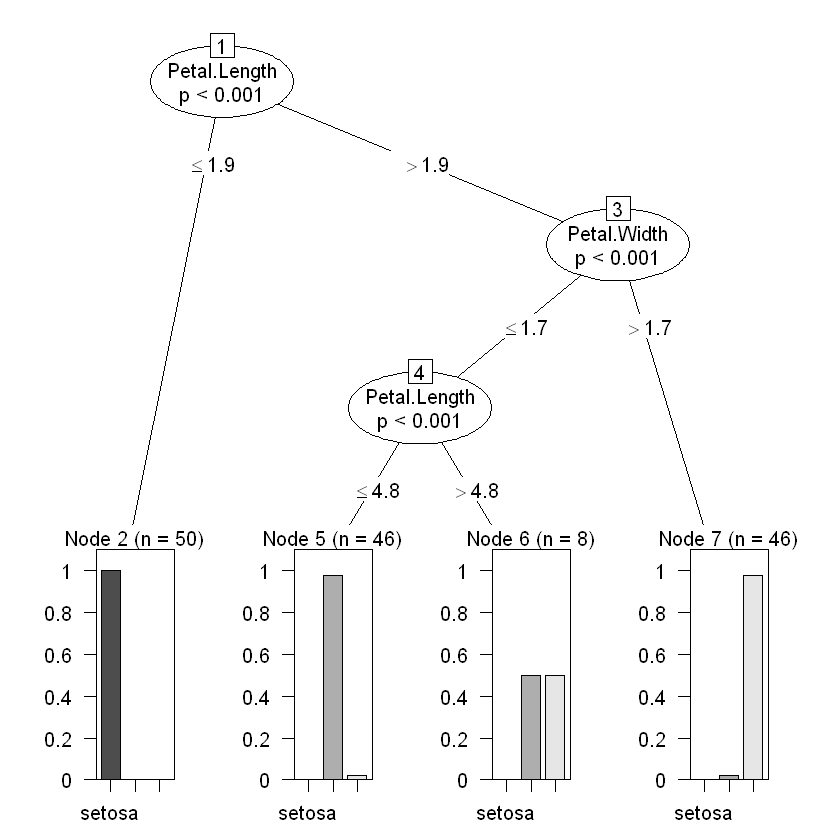

In [70]:
# Використання іншого набору даних (наприклад, iris)
data("iris")

# Побудова дерева рішень для набору iris
model_iris <- ctree(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris)

# Візуалізація
plot(model_iris)


8. Перевірка даних Iris


In [71]:
# Виведення перших рядків даних
head(iris)

# Перевірка структури набору даних
str(iris)

# Опис змінних у наборі даних
summary(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

9. Спроба іншої бібліотеки візуалізації за допомогою rpart (фаворит на сьогодні)


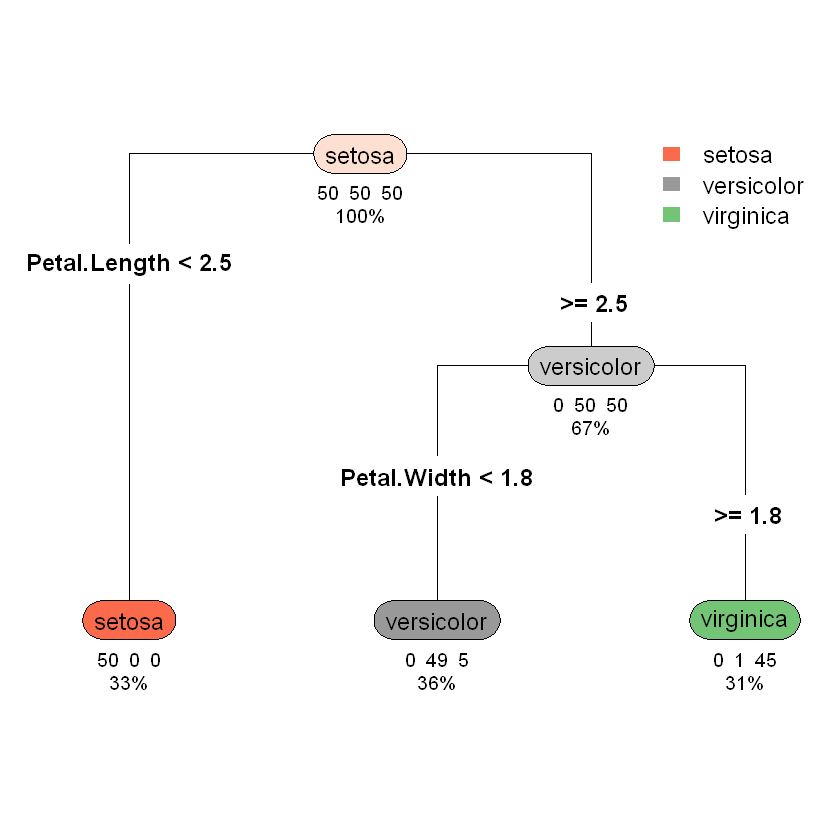

In [72]:
# Побудова дерева за допомогою rpart
model_rpart <- rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris, method = "class")

# Візуалізація дерева
rpart.plot(model_rpart, type = 4, extra = 101, under = TRUE, tweak = 1.2)


10. Побудова для Native Speaker


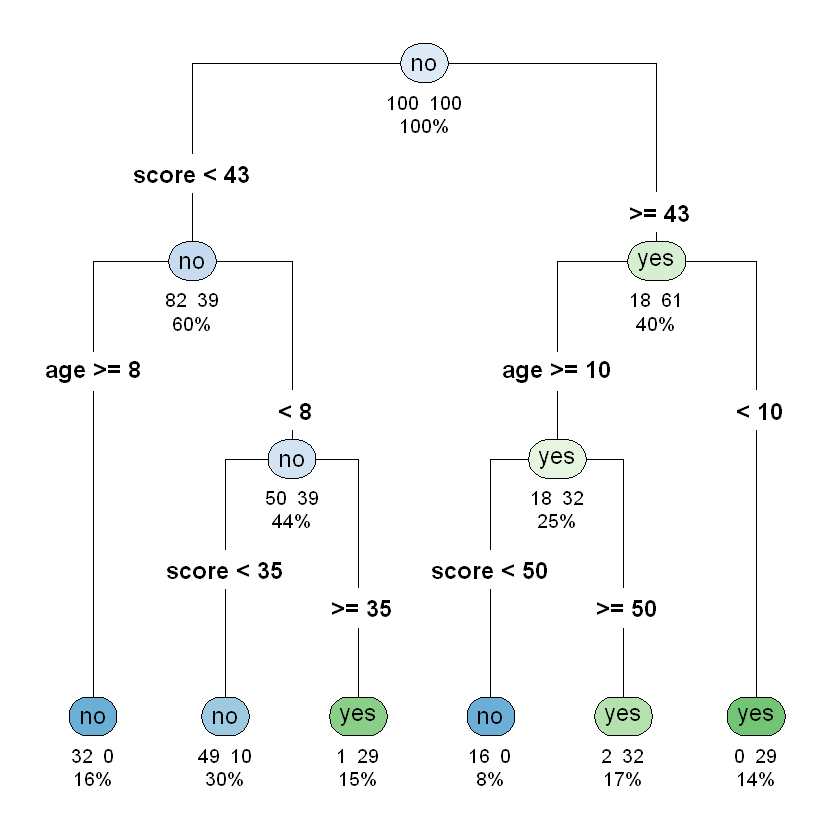

In [73]:

# Побудова дерева за допомогою rpart
model_rpart_2 <- rpart(nativeSpeaker ~ age + shoeSize + score, 
                        data = readingSkills, 
                        method = "class", 
                        control = rpart.control(minsplit = 5, minbucket = 3, maxdepth = 3))

# Візуалізація дерева
rpart.plot(model_rpart_2, type = 4, extra = 101, under = TRUE, tweak = 1.2)

11. Інший метод візуалізації (ggparty)


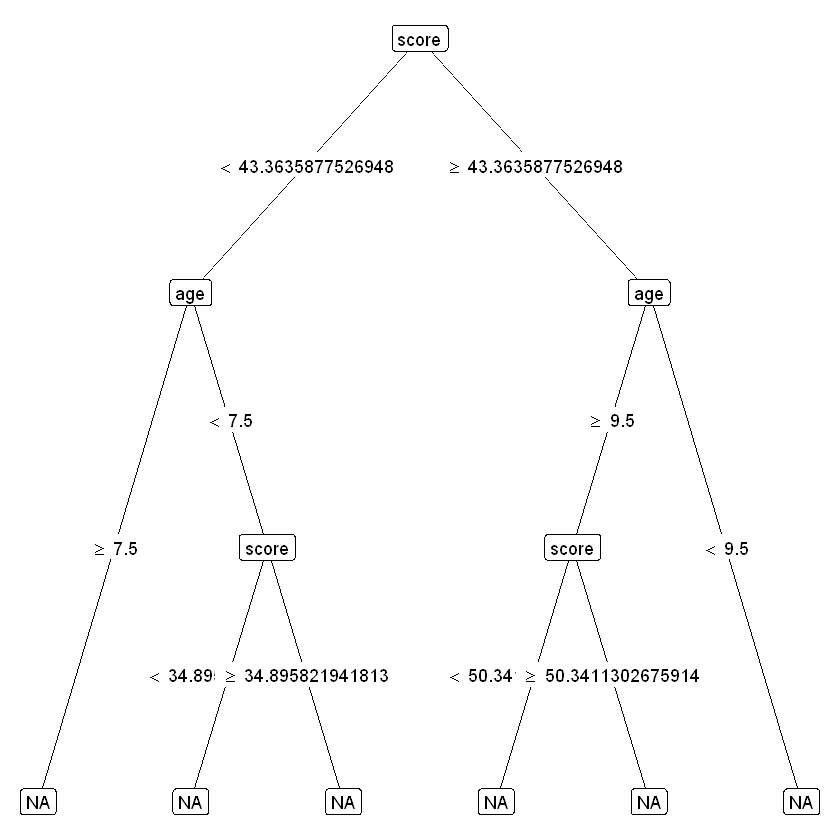

In [74]:
# Створюємо дерево
model_rpart <- rpart(nativeSpeaker ~ age + shoeSize + score, 
                     data = readingSkills, 
                     control = rpart.control(minsplit = 5, minbucket = 3, maxdepth = 3))

# Конвертуємо у partykit
model_party <- as.party(model_rpart)

ggparty(model_party) +
  geom_edge() +
  geom_edge_label() +
  geom_node_label(aes(label = splitvar), ids = "inner") +
  geom_node_label(aes(label = info), ids = "terminal")
